In [35]:
import pickle

with open("small_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("small_graph.pkl", "rb") as f:
    small_G = pickle.load(f)

In [36]:
# Simulate answers to qustions from user
quiz_answers = {
    # Shy
    "BAP2": "Strongly Agree",
    # Intellectual
    "BAP7": "Strongly Agree",
    # Strict
    "BAP8": "Strongly Agree",
    # Worldly
    "BAP11": "Disagree"
}

In [37]:
import numpy as np

def calculate_user_vector(quiz_answers, model):
    user_vector = np.zeros(model.vector_size)
    for axis, answer in quiz_answers.items():
        node = f"A:{answer}:{axis}"
        vec = model.wv[node]
        user_vector += vec
    user_vector /= len(quiz_answers)
    return user_vector

calculate_user_vector(quiz_answers, model)


array([ 0.19192245,  0.07690412, -0.18416112,  0.09664365,  0.27694013,
       -0.13928504, -0.01991835, -0.03488866, -0.09316326,  0.21110612,
        0.08583823,  0.28073456, -0.04416502, -0.12106894, -0.01066268,
        0.76247381, -0.13049978, -0.04151422, -0.35563954,  0.17825297,
       -0.25164261,  0.08303864, -0.20938278, -0.25082756, -0.04753563,
        0.30398976, -0.00790842,  0.15638458, -0.33189078,  0.09201283,
        0.09778139,  0.20610211,  0.20477402, -0.19295452, -0.40981224,
        0.0405626 ,  0.21218686, -0.25746075,  0.04031758,  0.04892033,
        0.22928503, -0.02429179,  0.18540234,  0.29355295,  0.1443426 ,
        0.20985377, -0.33615796, -0.08462952, -0.01657854,  0.10048843,
       -0.00561432,  0.48080816,  0.2453939 , -0.10102981, -0.08526468,
        0.04618183,  0.16083437, -0.37116534, -0.38129796, -0.11411401,
       -0.04030711, -0.00078348,  0.36859417,  0.45077842])

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_character_similarities(user_vector, model, small_G):
    character_nodes = [n for n in small_G.nodes if n.startswith("C:")]
    characters = [(n, model.wv[n]) for n in character_nodes]
    character_similarities = {n: cosine_similarity([vec], [user_vector]).flatten()[0] for n, vec in characters}
    return character_similarities

user_vector = calculate_user_vector(quiz_answers, model)
character_similarities = calculate_character_similarities(user_vector, model, small_G)
character_similarities

{'C:General Mark R. Naird': 0.5120536306965766,
 'C:Erin Naird': 0.43326631794605985,
 'C:Alex Karev': 0.45291235030198085,
 'C:Preston Burke': 0.22134124013616774,
 'C:Missy Armitage': 0.2098792978775576,
 'C:Baylan Skoll': 0.35468209376609083,
 'C:Luke Skywalker': 0.3979113081968393,
 'C:Yoda': 0.23112516647092146,
 'C:Shrek': 0.4092921942290948,
 'C:Princess Fiona': 0.21383843674814063,
 'C:Jake Sisko': 0.2937712013789125,
 'C:Rapunzel': 0.30456742523571356,
 'C:Sydney Carton': 0.30340713019368853,
 'C:Tallahassee': 0.35510551442532445,
 'C:Molly Hooper': 0.2523419603081271,
 'C:John Rayburn': 0.2798074700252916,
 'C:Meg Rayburn': 0.33154463773006704,
 'C:Frank Reagan': 0.3446822776373627,
 'C:Gretchen Wieners': 0.33263663373576513,
 'C:Karen Smith': 0.405491843884465,
 'C:Alex Dunphy': 0.2502205403312605,
 'C:Harry Crane': 0.045574514852297104,
 'C:Bert Cooper': 0.2149348836684277,
 'C:Henry Francis': 0.21927470313339062,
 'C:Nurse Mildred Ratched': 0.3306943491661205,
 'C:Billy Bi

(array([ 1.,  1.,  1.,  1.,  0.,  1.,  3.,  2.,  5.,  4., 10., 23.,  8.,
        12.,  7., 14., 18., 17., 15., 15., 12., 12.,  9.,  8.,  4.,  3.,
         3.,  0.,  1.,  1.]),
 array([0.00897857, 0.02687863, 0.04477868, 0.06267874, 0.0805788 ,
        0.09847885, 0.11637891, 0.13427897, 0.15217902, 0.17007908,
        0.18797914, 0.20587919, 0.22377925, 0.24167931, 0.25957936,
        0.27747942, 0.29537948, 0.31327953, 0.33117959, 0.34907964,
        0.3669797 , 0.38487976, 0.40277981, 0.42067987, 0.43857993,
        0.45647998, 0.47438004, 0.4922801 , 0.51018015, 0.52808021,
        0.54598027]),
 <BarContainer object of 30 artists>)

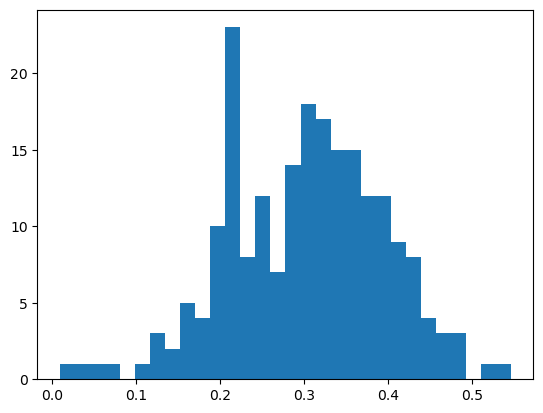

In [39]:
import matplotlib.pyplot as plt

plt.hist(character_similarities.values(), bins=30)


In [40]:
sorted_dict = dict(sorted(character_similarities.items(), key=lambda item: item[1], reverse=True))
sorted_dict

{'C:Asuka Langly Soryu': 0.5459802668921692,
 'C:General Mark R. Naird': 0.5120536306965766,
 'C:Boromir': 0.4867924011449852,
 'C:Jen Yu': 0.48246152241645057,
 'C:Bobbie Draper': 0.48226023422566766,
 'C:T-800': 0.4645264841868646,
 'C:Johnny Lawrence': 0.4586054510239532,
 'C:Fernando Sucre': 0.4565466753292907,
 'C:Kelly Severide': 0.4541532444177101,
 'C:Alex Karev': 0.45291235030198085,
 'C:Eric Effiong': 0.442653587987749,
 'C:Robby Keene': 0.4421557240474806,
 'C:SpongeBob SquarePants': 0.4353554298809965,
 'C:Connie Springer': 0.4343173308992939,
 'C:Erin Naird': 0.43326631794605985,
 'C:Lindsay Bluth Funke': 0.4324521518715648,
 'C:Ron Swanson': 0.4309700276384082,
 'C:Philip, Duke of Edinburgh': 0.4254088258482688,
 'C:Jayne Cobb': 0.42534154732541707,
 'C:Bumblebee': 0.4237168306085679,
 'C:Joey Tribbiani': 0.41705137059565006,
 'C:Alli Bhandari': 0.41655401545942583,
 'C:Faye Valentine': 0.4153320824602931,
 'C:Mumen Rider': 0.4121258602994471,
 'C:Merle Dixon': 0.41060094

In [41]:
quiz_answers = {
    # Shy
    "BAP2": "Strongly Agree",
    # Intellectual
    "BAP7": "Strongly Agree",
    # Strict
    "BAP8": "Strongly Agree",
    # Worldly
    "BAP11": "Disagree",
    "BAP28": "Strongly Disagree",
    "BAP60": "Agree",
    "BAP130": "Agree",
    "BAP229": "Strongly Disagree",
    "BAP389": "Strongly Agree",
    "BAP456": "Disagree"
}

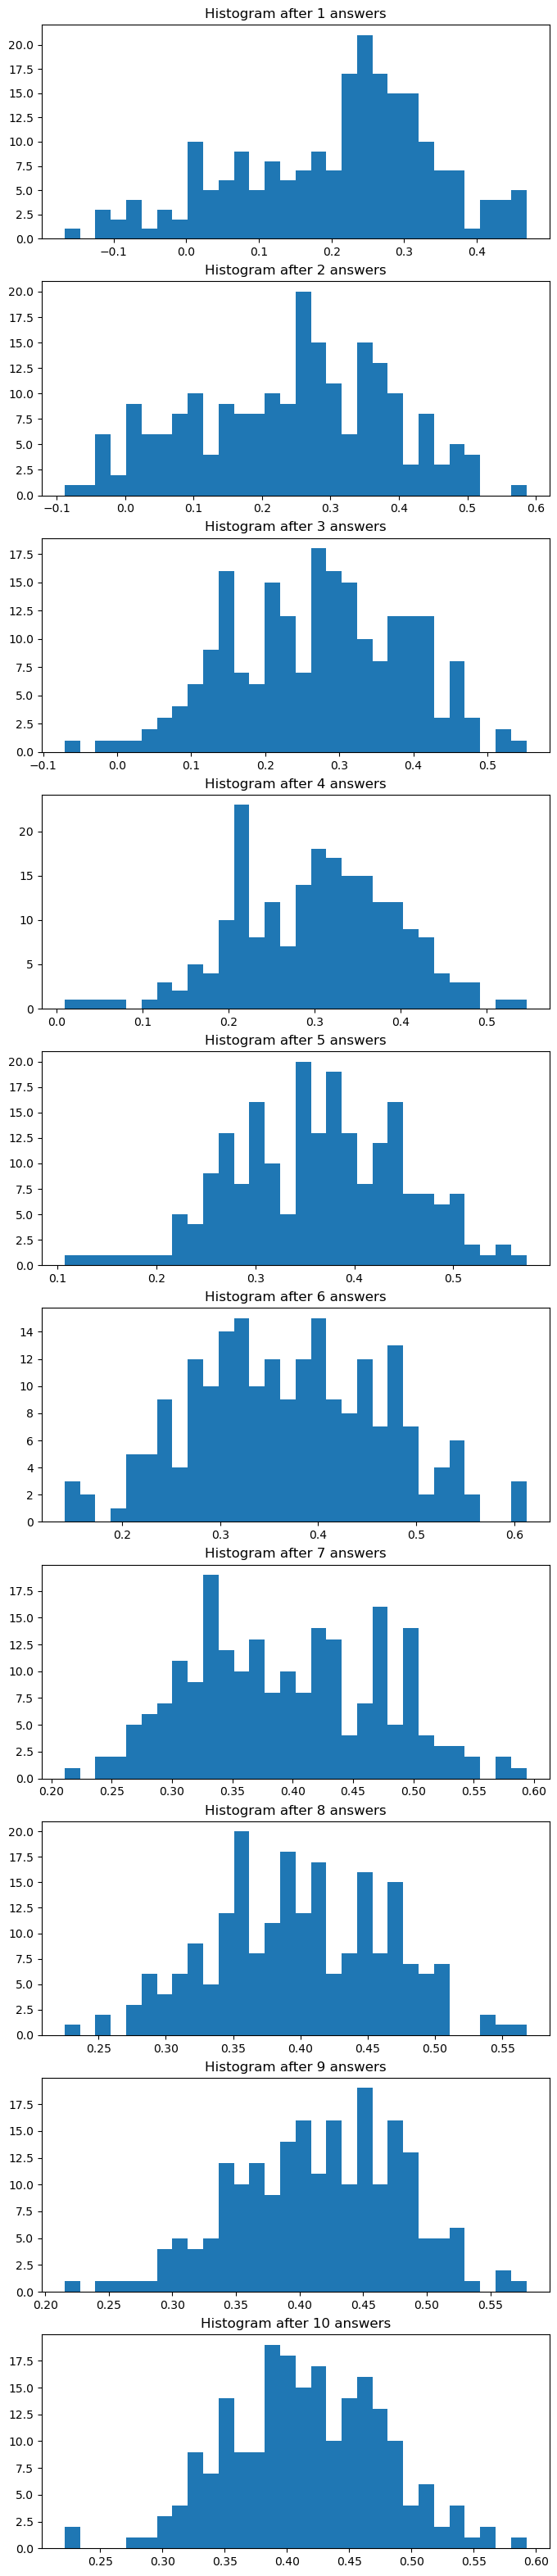

In [43]:
fig, axes = plt.subplots(len(quiz_answers), 1, figsize=(8, 4 * len(quiz_answers)))

for i in range(1, len(quiz_answers) + 1):
    subset = dict(list(quiz_answers.items())[:i])
    user_vector = calculate_user_vector(subset, model)
    character_similarities = calculate_character_similarities(user_vector, model, small_G)
    axes[i - 1].hist(character_similarities.values(), bins=30)
    axes[i - 1].set_title(f'Histogram after {i} answers')
    